## Importamos las librerías

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos el dataframe con el que vamos a trabajar

In [2]:
train = pd.read_csv('../data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5188 entries, 0 to 5187
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5188 non-null   float64
 1   volatile acidity      5188 non-null   float64
 2   citric acid           5188 non-null   float64
 3   residual sugar        5188 non-null   float64
 4   chlorides             5188 non-null   float64
 5   free sulfur dioxide   5188 non-null   float64
 6   total sulfur dioxide  5188 non-null   float64
 7   density               5188 non-null   float64
 8   pH                    5188 non-null   float64
 9   sulphates             5188 non-null   float64
 10  alcohol               5188 non-null   float64
 11  quality               5188 non-null   int64  
 12  type_num              5188 non-null   int64  
 13  alc-sug               5188 non-null   float64
 14  qua-sug               5188 non-null   float64
 15  aci-type             

### Aplicamos RandomOverSampler para equilibrar los valores de nuestro target

In [3]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [4]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         15645 non-null  float64
 1   volatile acidity      15645 non-null  float64
 2   citric acid           15645 non-null  float64
 3   residual sugar        15645 non-null  float64
 4   chlorides             15645 non-null  float64
 5   free sulfur dioxide   15645 non-null  float64
 6   total sulfur dioxide  15645 non-null  float64
 7   density               15645 non-null  float64
 8   pH                    15645 non-null  float64
 9   sulphates             15645 non-null  float64
 10  alcohol               15645 non-null  float64
 11  type_num              15645 non-null  int64  
 12  alc-sug               15645 non-null  float64
 13  qua-sug               15645 non-null  float64
 14  aci-type              15645 non-null  float64
 15  alc-citr           

### Definimos X e Y y aplicamos el train_test_split

In [5]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Generamos el Pipeline con StandardScaler, RandomForestClassifier y sus parametros de busqueda

In [7]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid ={
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,2,3,4],
    'classifier__n_estimators': [50, 100, 150,200],
    'classifier__max_depth': [2, 5, 10],
       
}

rf = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier()],
                         'classifier__max_depth': [2, 5, 10],
                         'classifier__max_features': [1, 2, 3, 4],
                         'classifier__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [8]:
print(rf.best_estimator_)
print(rf.best_score_)
print(rf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=1,
                                        n_estimators=200))])
0.8632146855083803
{'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__max_features': 1, 'classifier__n_estimators': 200}


### Elegimos el mejor modelo posible y lo guardamos

In [9]:
final_model= rf.best_estimator_.fit(X_train,y_train)
y_pred = rf.best_estimator_.predict(X_test)

### Evaluamos los resultados y generamos la matriz de confusión

In [10]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [11]:
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 457   0   0   2   0   0]
 [  0  22 357  44  29   1   0]
 [  0   7 111 199 127   9   0]
 [  0   0  19  31 386   6   0]
 [  0   0   0   0   6 433   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 86.77%


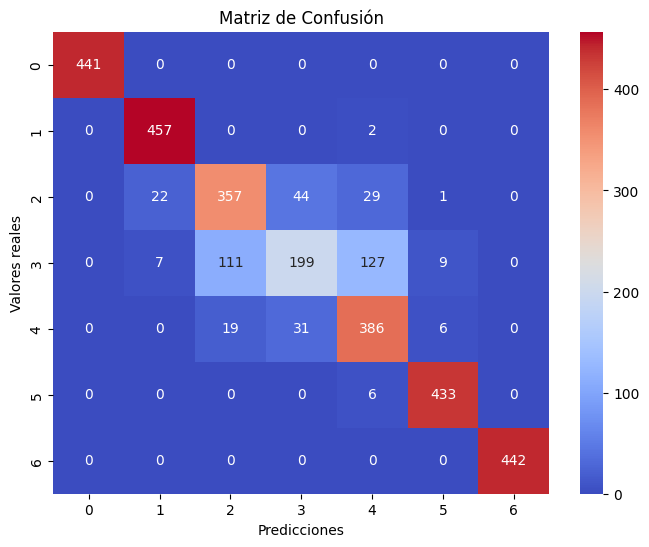

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

### Guardamos nuestro modelo en un archivo .pkl 

In [13]:
with open('../models/trained_model_1rf.pkl', 'wb') as modrfpipe :
    pickle.dump(final_model, modrfpipe)

# 2. GRADIANT BOOSTING

### Cargamos el dataframe con el que vamos a trabajar

In [14]:
train = pd.read_csv('../data/train.csv')


In [15]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

### Definimos X e Y y aplicamos el train_test_split

In [16]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Generamos el Pipeline con StandardScaler, GradientBoostingClassifier y sus parametros de busqueda

In [28]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', GradientBoostingClassifier())  
])

param_grid = {
    'classifier__n_estimators': [100, 150,200],
    'classifier__learning_rate': [0.2,0.5,1],
    'classifier__max_depth': [4, 5,6]
}

gb = GridSearchCV(pipe2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

gb.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.2, 0.5, 1],
                         'classifier__max_depth': [4, 5, 6],
                         'classifier__n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [29]:
print(gb.best_estimator_)
print(gb.best_score_)
print(gb.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=6,
                                            n_estimators=150))])
0.9066796840596396
{'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 150}


### Elegimos el mejor modelo posible y lo guardamos

In [30]:
gb_model= gb.best_estimator_.fit(X_train,y_train)


In [33]:
gb_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=6,
                                            n_estimators=150))])

In [32]:
y_pred2 = gb.best_estimator_.predict(X_test)

### Evaluamos los resultados y generamos la matriz de confusión

In [34]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm2)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy2 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  1   4 372  67   9   0   0]
 [  1   2  86 304  58   2   0]
 [  0   0   1  14 423   4   0]
 [  0   0   0   0   0 439   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 92.04%


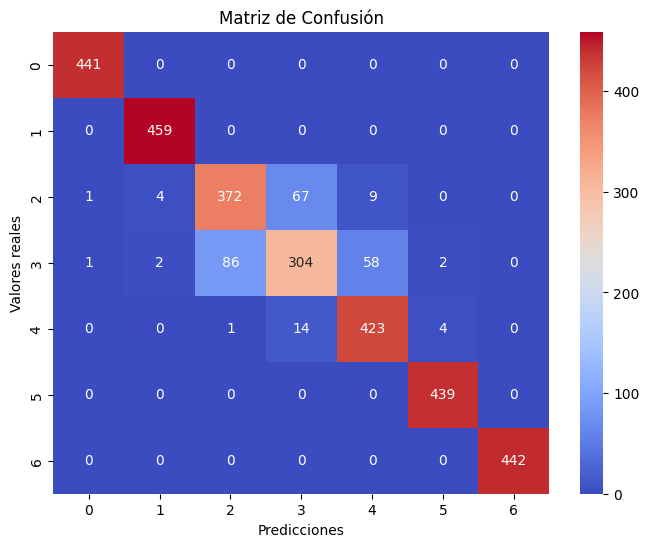

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

### Guardamos nuestro modelo en un archivo .pkl 

In [36]:
with open('../models/trained_model_2gb.pkl', 'wb') as archivo_salida :
    pickle.dump(gb_model, archivo_salida)

# 3- LOGISTIC REGRESSION

### Cargamos el dataframe con el que vamos a trabajar y aplicamos el RandomOverSampler

In [37]:
train = pd.read_csv('../data/train.csv')

X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

### Definimos X e Y y aplicamos el train_test_split

In [38]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Generamos el Pipeline con StandardScaler, LogisticRegression y sus parametros de busqueda

In [39]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression())  
])

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300,500],
    'classifier__solver': ['liblinear']
}

lg = GridSearchCV(pipe3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

lg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300, 500],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy')

In [40]:
print(lg.best_estimator_)
print(lg.best_score_)
print(lg.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, penalty='l1', solver='liblinear'))])
0.5296414270926006
{'classifier__C': 10, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


### Elegimos el mejor modelo posible y lo guardamos

In [41]:
lg_model= lg.best_estimator_.fit(X_train,y_train)
y_pred3 = lg.best_estimator_.predict(X_test)

### Evaluamos los resultados y generamos la matriz de confusión

In [42]:
cm3 = confusion_matrix(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Matriz de Confusión:")
print(cm3)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy3 * 100))

Matriz de Confusión:
[[262 100  55   0   0  24   0]
 [119 196  78  15  38  13   0]
 [ 79  69 225  33  21  24   2]
 [ 44  43  98  71 106  90   1]
 [ 23  16  30  39 120 208   6]
 [ 10  19   0  14 102 282  12]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 51.07%


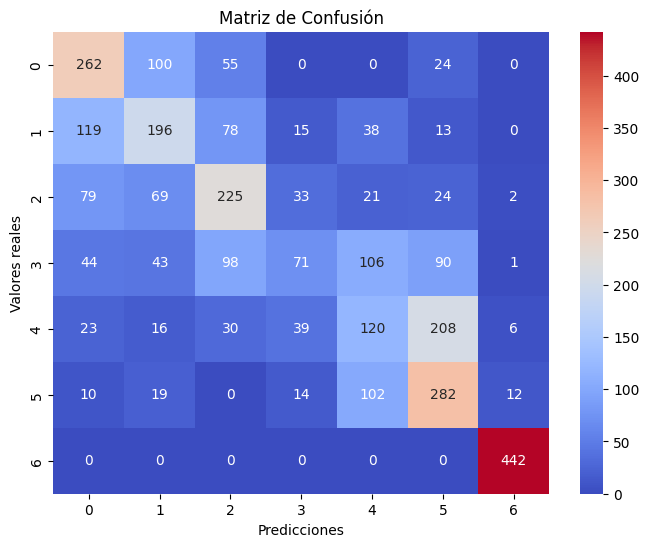

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

### Guardamos nuestro modelo en un archivo .pkl 

In [44]:
with open('../models/trained_model_3lg.pkl', 'wb') as archivo_salida :
    pickle.dump(lg_model, archivo_salida)

## 4. SVC MODEL

### Generamos el Pipeline con StandardScaler, SVC y sus parametros de busqueda

In [45]:
pipe4 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', svm.SVC())
])


svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,200],
    
}    

svc = GridSearchCV(pipe4, svm_param, cv=5, scoring='accuracy', n_jobs=-1)

svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier': [SVC()],
                         'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,
                                           200]},
             scoring='accuracy')

In [46]:
print(svc.best_estimator_)
print(svc.best_score_)
print(svc.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC(C=200))])
0.8704855451413577
{'classifier': SVC(), 'classifier__C': 200}


### Elegimos el mejor modelo posible y lo guardamos

In [47]:
svc_model= svc.best_estimator_.fit(X_train,y_train)
y_pred4 = svc.best_estimator_.predict(X_test)

### Evaluamos los resultados y generamos la matriz de confusión

In [48]:
cm4 = confusion_matrix(y_test, y_pred4)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Matriz de Confusión:")
print(cm4)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy4 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  6  18 332  83  14   0   0]
 [  3  12 109 236  81  12   0]
 [  0   0  14  35 386   7   0]
 [  0   0   0   0   1 438   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 87.38%


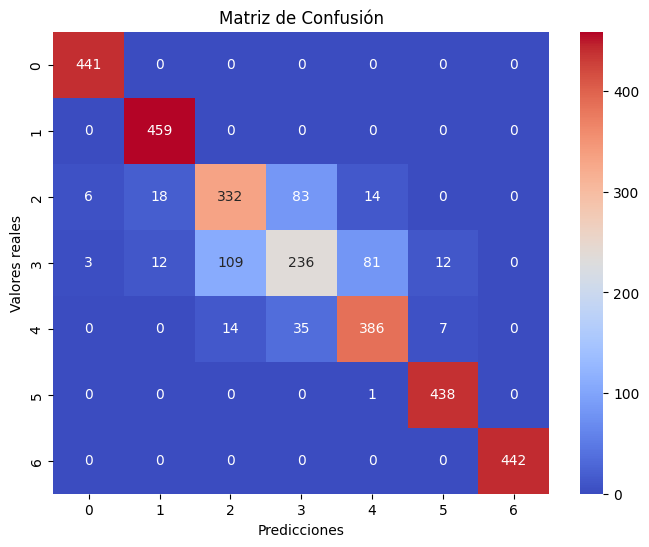

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

### Guardamos nuestro modelo en un archivo .pkl 

In [50]:
with open('../models/trained_model_4SVC.pkl', 'wb') as archivo_salida :
    pickle.dump(svc_model, archivo_salida)

## 5. KNEIGHBORS CLASSIFIER

### Generamos el Pipeline con StandardScaler, SVC y sus parametros de busqueda

In [51]:
pipe5 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

knn_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3, 5, 7,9,15],
}

knn = GridSearchCV(pipe5, knn_params, cv=5, scoring='accuracy', n_jobs=-1)

knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [3, 5, 7, 9, 15]},
             scoring='accuracy')

In [52]:
print(knn.best_estimator_)
print(knn.best_score_)
print(knn.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])
0.8441998355966451
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 3}


### Elegimos el mejor modelo posible y lo guardamos

In [53]:
knn_mod= knn.best_estimator_.fit(X_train,y_train)
y_pred5 = knn.best_estimator_.predict(X_test)

### Evaluamos los resultados y generamos la matriz de confusión

In [54]:
cm5 = confusion_matrix(y_test, y_pred5)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Matriz de Confusión:")
print(cm5)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy5 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  4  24 306  91  26   2   0]
 [  2  18 101 224  95  13   0]
 [  0   5  10  35 382  10   0]
 [  0   0   0   0   0 439   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 86.07%


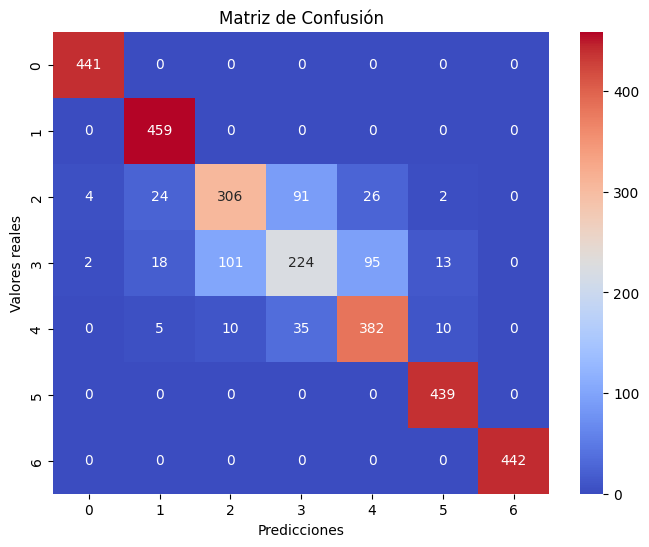

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

### Guardamos nuestro modelo en un archivo .pkl 

In [56]:
with open('../models/trained_model_5KNN.pkl', 'wb') as archivo_salida :
    pickle.dump(knn_mod, archivo_salida)